## 6. VAR Modeling

This script covers the VAR modelind and Granger causality analysis to understand the drives factors for cryptocurrency price movements

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, grangercausalitytests, pacf
import utils

In [2]:
summarised_all = pd.read_csv('input_model_file_new.csv')
summarised_all=summarised_all.drop(columns='Unnamed: 0')
summarised_all.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,uniq_tweet_vol,avg_tweet_len,...,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,direction,Close
0,2021-07-01 00:00:00,0.019014,0.850309,0.130299,0.322297,1369.962907,1.645935,2669,1292,127.158861,...,0.042338,2277.745,2277.745,2234.855,2246.095,3.109962e+06,0.049774,NaN,NaN,34502.0
1,2021-07-01 01:00:00,0.016242,0.854976,0.128778,0.308966,2216.534413,2.252812,2223,1091,127.018893,...,0.046784,2247.170,2269.555,2245.820,2263.150,5.887730e+06,0.045735,0.007593,1.0,34502.0
2,2021-07-01 02:00:00,0.014271,0.845937,0.139787,0.325600,1725.593437,1.622249,2499,1217,126.502201,...,0.048019,2263.010,2264.660,2193.080,2198.850,5.438700e+06,0.044663,-0.028412,0.0,34502.0
3,2021-07-01 03:00:00,0.011617,0.848367,0.140008,0.349539,2065.467465,0.762076,2505,1160,129.096607,...,0.031138,2202.140,2213.740,2184.665,2185.465,2.407530e+06,0.040330,-0.006087,0.0,34502.0
4,2021-07-01 04:00:00,0.015265,0.837811,0.143675,0.341826,1909.296520,1.840835,2155,1148,130.377262,...,0.043155,2186.675,2210.060,2181.900,2209.175,2.281976e+06,0.046832,0.010849,1.0,34502.0


In [5]:
summarised_all.columns

Index(['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'uniq_tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt', 'negative', 'neutral', 'positive',
       'Bullish_Ratio', 'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 'pct_change',
       'direction', 'Close'],
      dtype='object')

In [6]:
df_var = summarised_all[['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr',
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt',  'Bullish_Ratio',
       'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 
       'pct_change', 'Close']]
df_var['Date']=pd.to_datetime(df_var['Date'])

<ipython-input-6-065fe7219298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['Date']=pd.to_datetime(df_var['Date'])


In [7]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1104 non-null   datetime64[ns]
 1   avg_neg_scr        1104 non-null   float64       
 2   avg_neu_scr        1104 non-null   float64       
 3   avg_pos_scr        1104 non-null   float64       
 4   avg_cmp_scr        1104 non-null   float64       
 5   avg_retweet_cnt    1104 non-null   float64       
 6   avg_like_cnt       1104 non-null   float64       
 7   tweet_vol          1104 non-null   int64         
 8   avg_tweet_len      1104 non-null   float64       
 9   avg_followers_cnt  1104 non-null   float64       
 10  Bullish_Ratio      1104 non-null   float64       
 11  Negative_share     1104 non-null   float64       
 12  Open_prices        1104 non-null   float64       
 13  High_prices        1104 non-null   float64       
 14  Low_pric

In [8]:
df_var = df_var.fillna(0)
df_var.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
0,2021-07-01 00:00:00,0.019014,0.850309,0.130299,0.322297,1369.962907,1.645935,2669,127.158861,2413.022855,13.681416,0.042338,2277.745,2277.745,2234.855,2246.095,3.109962e+06,0.049774,0.000000,34502.0
1,2021-07-01 01:00:00,0.016242,0.854976,0.128778,0.308966,2216.534413,2.252812,2223,127.018893,1710.888889,11.365385,0.046784,2247.170,2269.555,2245.820,2263.150,5.887730e+06,0.045735,0.007593,34502.0
2,2021-07-01 02:00:00,0.014271,0.845937,0.139787,0.325600,1725.593437,1.622249,2499,126.502201,2313.409764,11.483333,0.048019,2263.010,2264.660,2193.080,2198.850,5.438700e+06,0.044663,-0.028412,34502.0
3,2021-07-01 03:00:00,0.011617,0.848367,0.140008,0.349539,2065.467465,0.762076,2505,129.096607,1885.437525,18.782051,0.031138,2202.140,2213.740,2184.665,2185.465,2.407530e+06,0.040330,-0.006087,34502.0
4,2021-07-01 04:00:00,0.015265,0.837811,0.143675,0.341826,1909.296520,1.840835,2155,130.377262,2985.108121,13.279570,0.043155,2186.675,2210.060,2181.900,2209.175,2.281976e+06,0.046832,0.010849,34502.0


### Essential Functions for running the tests

#### Descriptive statistics

In [9]:
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [10]:
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

#### Stationary tests

For modeling the multivariate time series, unit root test is performed to identify non-stationary variables and take differences of the evolving variables to reduce the bias induced by these variables. If there is a bias, t-statistics tests in the model won’t be reliable. Both Augmented Dicker-Fuller (ADF) and KPSS tests are performed to check for stationarity of the series

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

strict stationary = mean, variance, covariance are not function of time
trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
difference stationary = series can be made strict stationary by differencing

**1.ADF Augmented Dickey Fuller Test (unit root test)**

According to the ADF test, null hypothesis is that the series has a unit root and alternate hypothesis states that the series has no unit root. 

We accept the null hypothesis when t-score is greater than the critical value which means there is a unit root and series is non stationary. Otherwise we reject the null which means the series is stationary

adf can be interpreted as a difference stationary test

In [11]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

#### KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

Here the null hypothesis is opposite and it states that the series has a stationary trend and alternate hypothesis is that the series has a unit root and is non-stationary

So, we accept null hypothesis when t-score is less than critical value (series is stationary)
We reject null when t-score is greater than the critical value (series is not stationary

kpss classifies a series as stationary on the absence of a unit root
(both strict stationary and trend stationary will be classified as stationary)

In [12]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

In [13]:
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

In [14]:
###transforming variables
stationary = pd.DataFrame()

### Running test for variables

In [15]:
df_var =  df_var.drop_duplicates(subset=['Date'])

df_var=df_var[df_var['Date']>='2021-07-01'].set_index('Date')
df_var.shape

(1104, 19)

In [16]:
df_var

,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,0.019014,0.850309,0.130299,0.322297,1369.962907,1.645935,2669,127.158861,2413.022855,13.681416,0.042338,2277.745,2277.745,2234.855,2246.095,3.109962e+06,0.049774,0.000000,34502.00
2021-07-01 01:00:00,0.016242,0.854976,0.128778,0.308966,2216.534413,2.252812,2223,127.018893,1710.888889,11.365385,0.046784,2247.170,2269.555,2245.820,2263.150,5.887730e+06,0.045735,0.007593,34502.00
2021-07-01 02:00:00,0.014271,0.845937,0.139787,0.325600,1725.593437,1.622249,2499,126.502201,2313.409764,11.483333,0.048019,2263.010,2264.660,2193.080,2198.850,5.438700e+06,0.044663,-0.028412,34502.00
2021-07-01 03:00:00,0.011617,0.848367,0.140008,0.349539,2065.467465,0.762076,2505,129.096607,1885.437525,18.782051,0.031138,2202.140,2213.740,2184.665,2185.465,2.407530e+06,0.040330,-0.006087,34502.00
2021-07-01 04:00:00,0.015265,0.837811,0.143675,0.341826,1909.296520,1.840835,2155,130.377262,2985.108121,13.279570,0.043155,2186.675,2210.060,2181.900,2209.175,2.281976e+06,0.046832,0.010849,34502.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15 19:00:00,0.017321,0.802088,0.180329,0.441702,1041.551507,1.187684,7795,171.625016,924.532649,9.743833,0.067607,3194.100,3218.215,3172.985,3210.040,1.077578e+07,0.055889,0.004770,35515.38
2021-08-15 20:00:00,0.021588,0.882680,0.095349,0.202045,1344.118783,1.565608,5228,137.645562,1761.717865,5.364253,0.084545,3212.630,3270.465,3205.900,3261.595,1.465127e+07,0.045369,0.016061,35515.38
2021-08-15 21:00:00,0.013313,0.877528,0.109161,0.295660,916.840806,0.922334,7249,169.001655,1102.571941,12.216285,0.054214,3263.050,3278.125,3246.875,3262.120,5.268902e+06,0.038122,0.000161,35515.38


In [17]:
df_var['pct_change'] = df_var['pct_change']+1

In [18]:
df_var.columns

Index(['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close'],
      dtype='object')

In [19]:
df_var_log=pd.DataFrame()

#### take log transformations of the series 

In [24]:
df_var['avg_cmp_scr'] = df_var['avg_cmp_scr'] +1


Descriptive Statistics for 'avg_neg_scr' 

 count    1104.000000
mean       -3.911843
std         0.625477
min        -5.769714
25%        -4.385285
50%        -3.831842
75%        -3.484669
max        -2.064947
Name: avg_neg_scr, dtype: float64


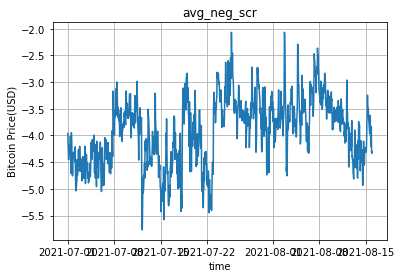


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                   -4.103843
p-value                    0.000954
# of lags used            10.000000
# of observations       1093.000000
critical value (1%)       -3.436347
critical value (5%)       -2.864188
critical value (10%)      -2.568180
dtype: float64

KPSS: The data 'avg_neg_scr' is NOT STATIONARY 

 t-score                   0.214034
p-value                   0.010737
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    1104.000000
mean       -0.140762
std         0.032237
min        -0.255197
25%        -0.161032
50%        -0.136383
75%        -0.117720
max        -0.055352
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


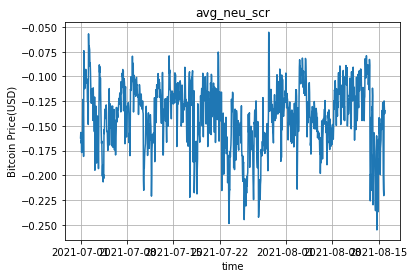


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                   -4.565298
p-value                    0.000150
# of lags used            16.000000
# of observations       1087.000000
critical value (1%)       -3.436380
critical value (5%)       -2.864203
critical value (10%)      -2.568188
dtype: float64

KPSS: The data 'avg_neu_scr' is NOT STATIONARY 

 t-score                   0.160514
p-value                   0.037905
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_pos_scr' 

 count    1104.000000
mean       -2.273471
std         0.259653
min        -3.207361
25%        -2.441850
50%        -2.267757
75%        -2.104889
max        -1.538266
Name: avg_pos_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


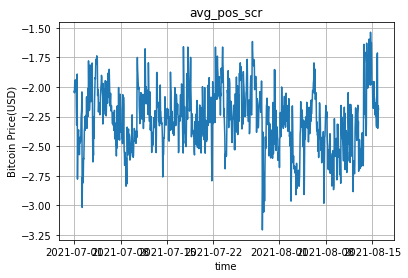


ADF: The data 'avg_pos_scr' is STATIONARY 

 t-score                -5.851766e+00
p-value                 3.575575e-07
# of lags used          9.000000e+00
# of observations       1.094000e+03
critical value (1%)    -3.436342e+00
critical value (5%)    -2.864186e+00
critical value (10%)   -2.568179e+00
dtype: float64

KPSS: The data 'avg_pos_scr' is STATIONARY 

 t-score                   0.114856
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_cmp_scr' 

 count    1104.000000
mean        0.189847
std         0.082680
min        -0.222330
25%         0.138251
50%         0.192702
75%         0.244866
max         0.450692
Name: avg_cmp_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


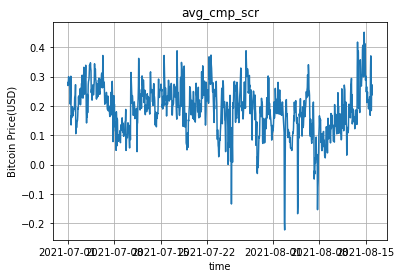


ADF: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   -5.291418
p-value                    0.000006
# of lags used             9.000000
# of observations       1094.000000
critical value (1%)       -3.436342
critical value (5%)       -2.864186
critical value (10%)      -2.568179
dtype: float64

KPSS: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   0.137003
p-value                   0.066662
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_retweet_cnt' 

 count    1104.000000
mean        7.385982
std         0.617359
min         5.710867
25%         6.959675
50%         7.378965
75%         7.800012
max         9.437271
Name: avg_retweet_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


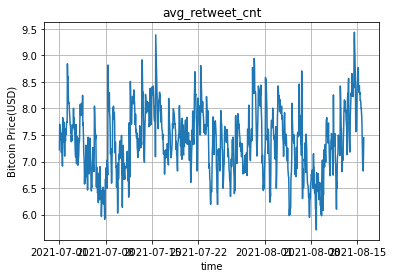


ADF: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   -3.298476
p-value                    0.014947
# of lags used            20.000000
# of observations       1083.000000
critical value (1%)       -3.436403
critical value (5%)       -2.864212
critical value (10%)      -2.568193
dtype: float64

KPSS: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   0.132250
p-value                   0.075463
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_like_cnt' 

 count    1104.000000
mean        0.264892
std         0.554372
min        -1.655192
25%        -0.087019
50%         0.259338
75%         0.592152
max         4.782793
Name: avg_like_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


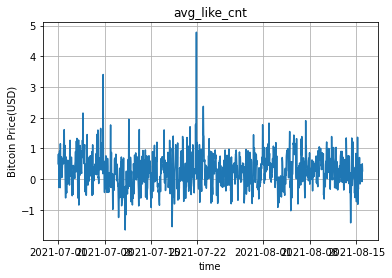


ADF: The data 'avg_like_cnt' is STATIONARY 

 t-score                   -5.006966
p-value                    0.000021
# of lags used            22.000000
# of observations       1081.000000
critical value (1%)       -3.436414
critical value (5%)       -2.864217
critical value (10%)      -2.568196
dtype: float64

KPSS: The data 'avg_like_cnt' is STATIONARY 

 t-score                   0.126981
p-value                   0.085220
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    1104.000000
mean        8.387794
std         0.395549
min         7.441907
25%         8.110052
50%         8.361942
75%         8.659517
max         9.928717
Name: tweet_vol, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


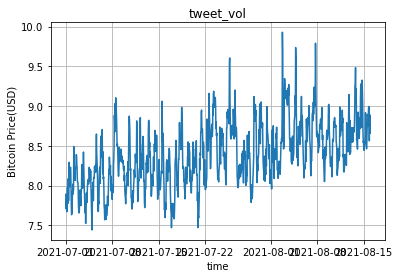

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'tweet_vol' is NOT STATIONARY 

 t-score                   -2.857651
p-value                    0.050499
# of lags used            20.000000
# of observations       1083.000000
critical value (1%)       -3.436403
critical value (5%)       -2.864212
critical value (10%)      -2.568193
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.059064
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    1104.000000
mean        4.835451
std         0.074446
min         4.390567
25%         4.797023
50%         4.829516
75%         4.866680
max         5.220935
Name: avg_tweet_len, dtype: float64


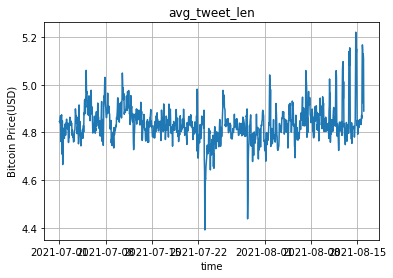


ADF: The data 'avg_tweet_len' is NOT STATIONARY 

 t-score                   -2.747118
p-value                    0.066234
# of lags used            22.000000
# of observations       1081.000000
critical value (1%)       -3.436414
critical value (5%)       -2.864217
critical value (10%)      -2.568196
dtype: float64

KPSS: The data 'avg_tweet_len' is NOT STATIONARY 

 t-score                   0.511337
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    1104.000000
mean        7.294147
std         0.418591
min         6.130343
25%         7.011725
50%         7.272626
75%         7.540156
max        11.125647
Name: avg_followers_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


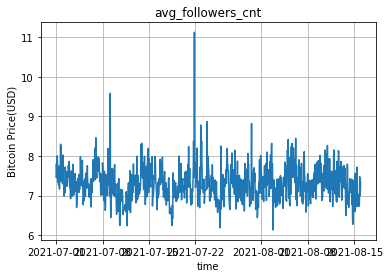

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   -4.149494
p-value                    0.000801
# of lags used            22.000000
# of observations       1081.000000
critical value (1%)       -3.436414
critical value (5%)       -2.864217
critical value (10%)      -2.568196
dtype: float64

KPSS: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   0.09258
p-value                   0.10000
# lags used              22.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'Bullish_Ratio' 

 count    1104.000000
mean        1.668269
std         0.831493
min        -0.948360
25%         1.031472
50%         1.665733
75%         2.325090
max         3.999510
Name: Bullish_Ratio, dtype: float64


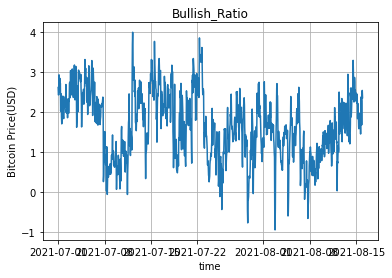

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Bullish_Ratio' is STATIONARY 

 t-score                   -4.985203
p-value                    0.000024
# of lags used             7.000000
# of observations       1096.000000
critical value (1%)       -3.436331
critical value (5%)       -2.864181
critical value (10%)      -2.568176
dtype: float64

KPSS: The data 'Bullish_Ratio' is STATIONARY 

 t-score                   0.131991
p-value                   0.075942
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    1104.000000
mean       -2.448338
std         0.681149
min        -4.270411
25%        -2.991523
50%        -2.401727
75%        -1.919340
max        -0.698870
Name: Negative_share, dtype: float64


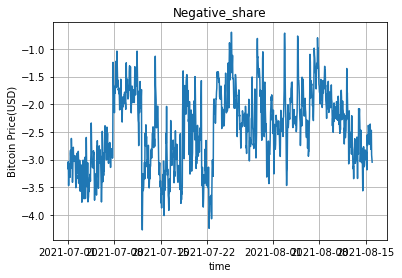

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Negative_share' is STATIONARY 

 t-score                   -4.582090
p-value                    0.000139
# of lags used             7.000000
# of observations       1096.000000
critical value (1%)       -3.436331
critical value (5%)       -2.864181
critical value (10%)      -2.568176
dtype: float64

KPSS: The data 'Negative_share' is NOT STATIONARY 

 t-score                   0.155490
p-value                   0.042092
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    1104.000000
mean        7.762764
std         0.175992
min         7.454679
25%         7.634960
50%         7.727794
75%         7.874402
max         8.109226
Name: Open_prices, dtype: float64


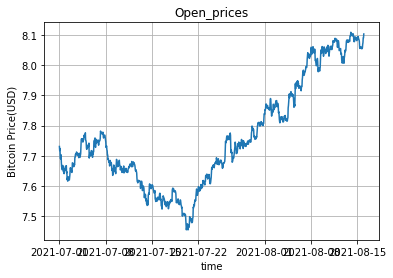

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Open_prices' is NOT STATIONARY 

 t-score                    0.184462
p-value                    0.971377
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'Open_prices' is NOT STATIONARY 

 t-score                   1.074779
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    1104.000000
mean        7.769671
std         0.176287
min         7.469366
25%         7.640451
50%         7.735721
75%         7.884850
max         8.111676
Name: High_prices, dtype: float64


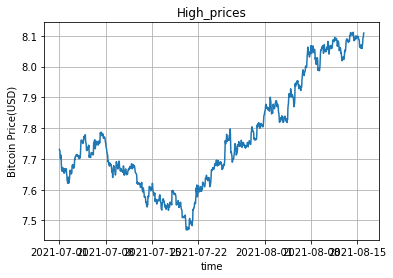

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'High_prices' is NOT STATIONARY 

 t-score                    0.023587
p-value                    0.960440
# of lags used             1.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'High_prices' is NOT STATIONARY 

 t-score                   1.074455
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    1104.000000
mean        7.755958
std         0.175870
min         7.448951
25%         7.628197
50%         7.717709
75%         7.866107
max         8.102022
Name: Low_prices, dtype: float64


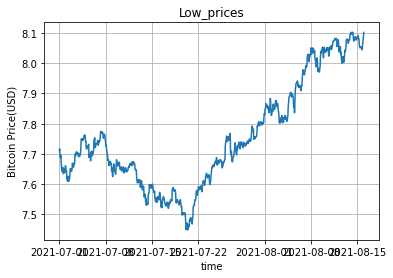

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Low_prices' is NOT STATIONARY 

 t-score                    0.071772
p-value                    0.964080
# of lags used             1.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Low_prices' is NOT STATIONARY 

 t-score                   1.07448
p-value                   0.01000
# lags used              22.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    1104.000000
mean        7.763059
std         0.176301
min         7.454798
25%         7.635037
50%         7.728148
75%         7.875347
max         8.109005
Name: Close_prices, dtype: float64


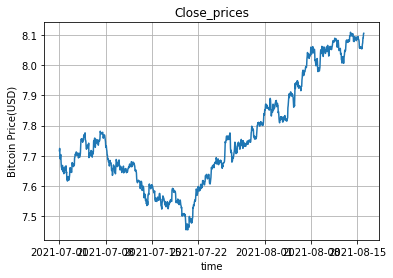

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Close_prices' is NOT STATIONARY 

 t-score                    0.191853
p-value                    0.971801
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'Close_prices' is NOT STATIONARY 

 t-score                   1.073086
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    1104.000000
mean       15.169753
std         0.860918
min        13.242078
25%        14.548572
50%        15.043805
75%        15.752302
max        18.139606
Name: Volume_BTC, dtype: float64


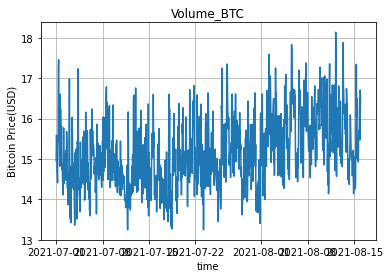

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Volume_BTC' is STATIONARY 

 t-score                   -3.814219
p-value                    0.002765
# of lags used            17.000000
# of observations       1086.000000
critical value (1%)       -3.436386
critical value (5%)       -2.864205
critical value (10%)      -2.568189
dtype: float64

KPSS: The data 'Volume_BTC' is NOT STATIONARY 

 t-score                   0.249154
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    1104.000000
mean       -3.092657
std         0.300668
min        -4.027566
25%        -3.314753
50%        -3.062924
75%        -2.865334
max        -2.235010
Name: polarity, dtype: float64


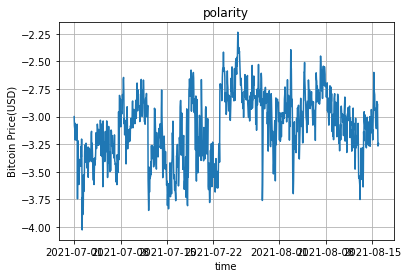

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'polarity' is STATIONARY 

 t-score                   -4.121126
p-value                    0.000894
# of lags used            10.000000
# of observations       1093.000000
critical value (1%)       -3.436347
critical value (5%)       -2.864188
critical value (10%)      -2.568180
dtype: float64

KPSS: The data 'polarity' is NOT STATIONARY 

 t-score                   0.224654
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'pct_change' 

 count    1104.000000
mean        0.000352
std         0.009256
min        -0.047874
25%        -0.004660
50%         0.000448
75%         0.005141
max         0.043068
Name: pct_change, dtype: float64


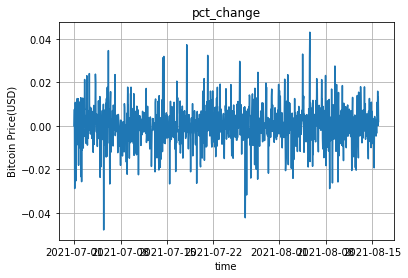


ADF: The data 'pct_change' is STATIONARY 

 t-score                  -32.052767
p-value                    0.000000
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'pct_change' is STATIONARY 

 t-score                   0.056098
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    1104.000000
mean       10.461237
std         0.008668
min        10.426974
25%        10.456980
50%        10.461258
75%        10.465602
max        10.478561
Name: Close, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


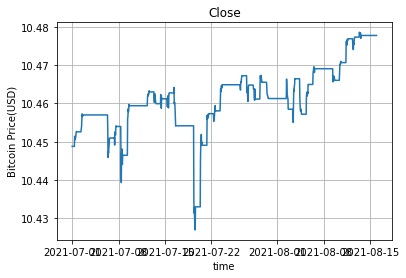


ADF: The data 'Close' is NOT STATIONARY 

 t-score                   -2.173645
p-value                    0.215949
# of lags used             6.000000
# of observations       1097.000000
critical value (1%)       -3.436325
critical value (5%)       -2.864178
critical value (10%)      -2.568175
dtype: float64

KPSS: The data 'Close' is NOT STATIONARY 

 t-score                   0.291261
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_cmp_scr' 

 count    1104.000000
mean        0.189847
std         0.082680
min        -0.222330
25%         0.138251
50%         0.192702
75%         0.244866
max         0.450692
Name: avg_cmp_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


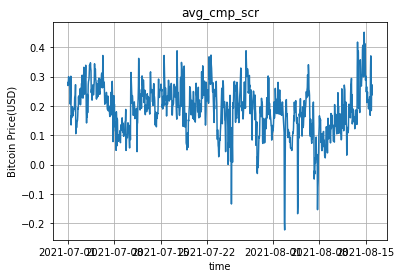


ADF: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   -5.291418
p-value                    0.000006
# of lags used             9.000000
# of observations       1094.000000
critical value (1%)       -3.436342
critical value (5%)       -2.864186
critical value (10%)      -2.568179
dtype: float64

KPSS: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   0.137003
p-value                   0.066662
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,-3.962587,-0.162155,-2.037926,0.279370,7.222539,0.498308,7.889459,4.845437,7.788636,2.616038,-3.162071,7.730941,7.730941,7.711932,7.716948,14.950121,-3.000257,0.000000,10.448773
2021-07-01 01:00:00,-4.120126,-0.156682,-2.049664,0.269237,7.703700,0.812179,7.706613,4.844336,7.444768,2.430572,-3.062222,7.717427,7.727339,7.716826,7.724513,15.588381,-3.084895,0.007564,10.448773
2021-07-01 02:00:00,-4.249560,-0.167310,-1.967637,0.281865,7.453326,0.483813,7.823646,4.840260,7.746478,2.440897,-3.036154,7.724451,7.725180,7.693062,7.695690,15.509051,-3.108599,-0.028823,10.448773
2021-07-01 03:00:00,-4.455271,-0.164442,-1.966053,0.299763,7.633112,-0.271709,7.826044,4.860561,7.541915,2.932902,-3.469335,7.697185,7.702439,7.689218,7.689584,14.694112,-3.210662,-0.006106,10.448773
2021-07-01 04:00:00,-4.182165,-0.176963,-1.940203,0.294031,7.554490,0.610219,7.675546,4.870432,8.001391,2.586227,-3.142947,7.690137,7.700775,7.687951,7.700374,14.640552,-3.061184,0.010791,10.448773


In [25]:
col_list=[ 
       'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close','avg_cmp_scr']
for metric_name in df_var[col_list]:
    metric = df_var[metric_name]
    
    df_var_log[metric_name] = df_var[metric_name].apply(np.log).dropna()
# run tests to see if stationary
    series_analysis(df_var_log,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

df_var_log.head()


Descriptive Statistics for 'avg_neg_scr' 

 count    1103.000000
mean       -0.000305
std         0.285059
min        -1.283804
25%        -0.180195
50%        -0.010505
75%         0.149688
max         1.221982
Name: avg_neg_scr, dtype: float64


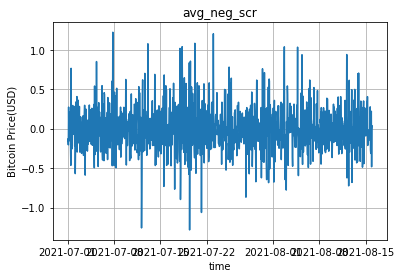


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                -1.446423e+01
p-value                 6.768576e-27
# of lags used          9.000000e+00
# of observations       1.093000e+03
critical value (1%)    -3.436347e+00
critical value (5%)    -2.864188e+00
critical value (10%)   -2.568180e+00
dtype: float64

KPSS: The data 'avg_neg_scr' is STATIONARY 

 t-score                   0.02024
p-value                   0.10000
# lags used              22.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    1103.000000
mean        0.000025
std         0.021729
min        -0.126846
25%        -0.010287
50%         0.000012
75%         0.011454
max         0.106876
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


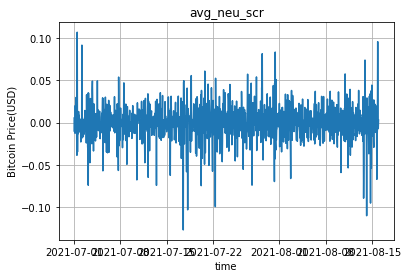


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                -1.195848e+01
p-value                 4.155555e-22
# of lags used          1.500000e+01
# of observations       1.087000e+03
critical value (1%)    -3.436380e+00
critical value (5%)    -2.864203e+00
critical value (10%)   -2.568188e+00
dtype: float64

KPSS: The data 'avg_neu_scr' is STATIONARY 

 t-score                   0.015174
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    1103.000000
mean        0.000040
std         0.051746
min        -0.378987
25%        -0.022776
50%         0.001203
75%         0.023715
max         0.315013
Name: avg_tweet_len, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


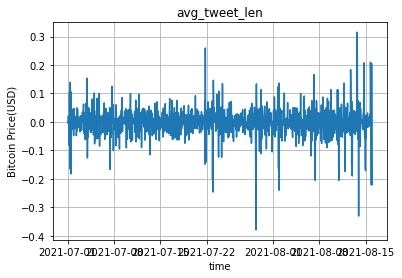

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                -1.518842e+01
p-value                 6.058360e-28
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'avg_tweet_len' is STATIONARY 

 t-score                   0.016475
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    1103.000000
mean        0.000698
std         0.181601
min        -0.631542
25%        -0.110354
50%        -0.006544
75%         0.096625
max         1.036105
Name: tweet_vol, dtype: float64


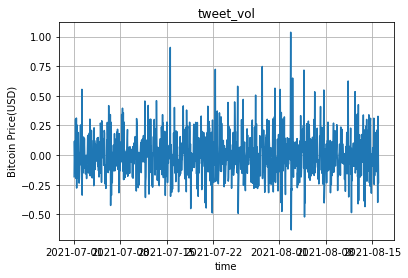

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'tweet_vol' is STATIONARY 

 t-score                -1.516774e+01
p-value                 6.455486e-28
# of lags used          1.900000e+01
# of observations       1.083000e+03
critical value (1%)    -3.436403e+00
critical value (5%)    -2.864212e+00
critical value (10%)   -2.568193e+00
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.015914
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    1103.000000
mean        0.000105
std         0.312742
min        -1.664810
25%        -0.179473
50%        -0.012460
75%         0.160811
max         1.666683
Name: Negative_share, dtype: float64


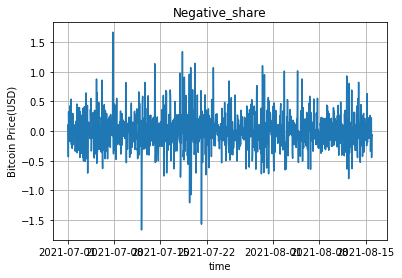


ADF: The data 'Negative_share' is STATIONARY 

 t-score                -1.038136e+01
p-value                 2.134853e-18
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'Negative_share' is STATIONARY 

 t-score                   0.018324
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    1103.000000
mean        0.000353
std         0.008764
min        -0.056249
25%        -0.003730
50%         0.000905
75%         0.005093
max         0.038007
Name: Low_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


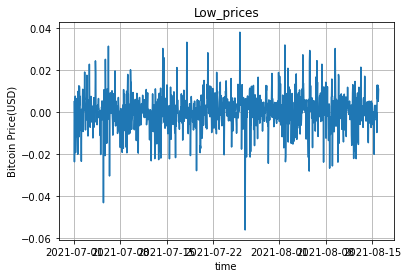

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Low_prices' is STATIONARY 

 t-score                  -28.988860
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.053788
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    1103.000000
mean        0.000343
std         0.008674
min        -0.042697
25%        -0.003619
50%        -0.000394
75%         0.004519
max         0.047979
Name: High_prices, dtype: float64


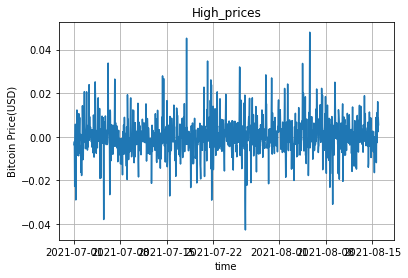

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'High_prices' is STATIONARY 

 t-score                  -28.623959
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.057255
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    1103.000000
mean        0.000338
std         0.009293
min        -0.049463
25%        -0.004752
50%         0.000644
75%         0.005253
max         0.042796
Name: Open_prices, dtype: float64


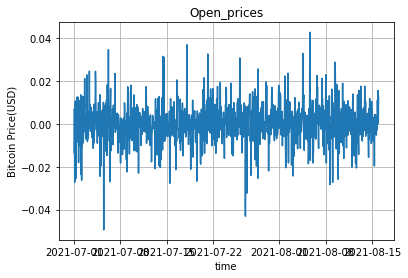

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Open_prices' is STATIONARY 

 t-score                  -32.120641
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.056033
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    1103.000000
mean        0.000352
std         0.009260
min        -0.047874
25%        -0.004661
50%         0.000462
75%         0.005142
max         0.043068
Name: Close_prices, dtype: float64


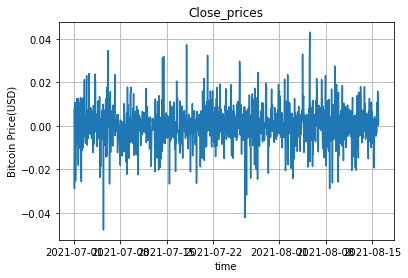

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close_prices' is STATIONARY 

 t-score                  -32.046166
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.056129
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    1103.000000
mean        0.001272
std         0.763999
min        -2.996661
25%        -0.481304
50%        -0.020601
75%         0.455655
max         2.771035
Name: Volume_BTC, dtype: float64


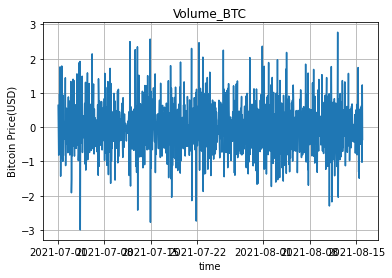

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Volume_BTC' is STATIONARY 

 t-score                -1.205186e+01
p-value                 2.586386e-22
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.011642
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    1103.000000
mean        0.000026
std         0.001185
min        -0.019488
25%         0.000000
50%         0.000000
75%         0.000000
max         0.012256
Name: Close, dtype: float64


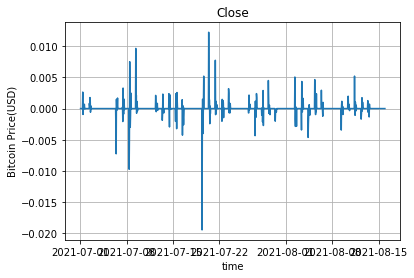

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close' is STATIONARY 

 t-score                -1.416985e+01
p-value                 2.012144e-26
# of lags used          5.000000e+00
# of observations       1.097000e+03
critical value (1%)    -3.436325e+00
critical value (5%)    -2.864178e+00
critical value (10%)   -2.568175e+00
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.023649
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    1103.000000
mean       -0.000221
std         0.154589
min        -0.797372
25%        -0.091501
50%        -0.004051
75%         0.085328
max         0.732967
Name: polarity, dtype: float64


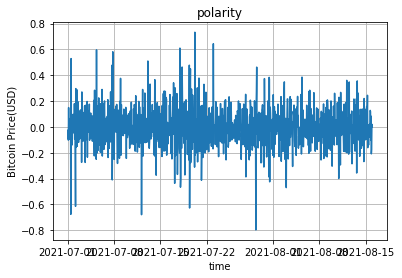


ADF: The data 'polarity' is STATIONARY 

 t-score                -1.459787e+01
p-value                 4.211982e-27
# of lags used          9.000000e+00
# of observations       1.093000e+03
critical value (1%)    -3.436347e+00
critical value (5%)    -2.864188e+00
critical value (10%)   -2.568180e+00
dtype: float64

KPSS: The data 'polarity' is STATIONARY 

 t-score                   0.019491
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


,avg_neg_scr,avg_neu_scr,avg_tweet_len,tweet_vol,Negative_share,Low_prices,High_prices,Open_prices,Close_prices,Volume_BTC,Close,polarity
Date,,,,,,,,,,,,
2021-07-01 01:00:00,-0.157539,0.005473,-0.001101,-0.182846,0.099849,0.004894,-0.003602,-0.013514,0.007564,0.638260,0.0,-0.084638
2021-07-01 02:00:00,-0.129434,-0.010628,-0.004076,0.117033,0.026068,-0.023764,-0.002159,0.007024,-0.028823,-0.079330,0.0,-0.023704
2021-07-01 03:00:00,-0.205711,0.002869,0.020301,0.002398,-0.433181,-0.003844,-0.022741,-0.027266,-0.006106,-0.814939,0.0,-0.102063
2021-07-01 04:00:00,0.273107,-0.012521,0.009871,-0.150498,0.326389,-0.001266,-0.001664,-0.007047,0.010791,-0.053560,0.0,0.149478
2021-07-01 05:00:00,-0.099587,0.020248,-0.081034,-0.003254,0.065774,0.007522,0.005757,0.010683,0.003624,-0.229588,0.0,-0.096858


In [26]:
# ['price'] = log & diff
col_list=[ 'avg_neg_scr','avg_neu_scr','avg_tweet_len',
       'tweet_vol','Negative_share','Low_prices' ,'High_prices','Open_prices',
       'Close_prices', 'Volume_BTC','Close','polarity']
for metric_name in df_var_log[col_list]:
    metric = df_var_log[metric_name]
    
    stationary[metric_name] = df_var_log[metric_name].diff().dropna()
# run tests to see if stationary
    series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

In [27]:
df_var_log1 = df_var_log[1:]
df_var_log1.shape

(1103, 19)

In [28]:
# ['price'] = log & diff
col_list=[ 'avg_pos_scr','avg_cmp_scr','avg_like_cnt','avg_followers_cnt','Bullish_Ratio','avg_retweet_cnt',
        'pct_change' ]

for metric_name in df_var_log1[col_list]:
    metric = df_var_log1[metric_name]
    
    stationary[metric_name] = df_var_log1[metric_name]
# run tests to see if stationary
    #series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

,avg_neg_scr,avg_neu_scr,avg_tweet_len,tweet_vol,Negative_share,Low_prices,High_prices,Open_prices,Close_prices,Volume_BTC,Close,polarity,avg_pos_scr,avg_cmp_scr,avg_like_cnt,avg_followers_cnt,Bullish_Ratio,avg_retweet_cnt,pct_change
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 01:00:00,-0.157539,0.005473,-0.001101,-0.182846,0.099849,0.004894,-0.003602,-0.013514,0.007564,0.638260,0.0,-0.084638,-2.049664,0.269237,0.812179,7.444768,2.430572,7.703700,0.007564
2021-07-01 02:00:00,-0.129434,-0.010628,-0.004076,0.117033,0.026068,-0.023764,-0.002159,0.007024,-0.028823,-0.079330,0.0,-0.023704,-1.967637,0.281865,0.483813,7.746478,2.440897,7.453326,-0.028823
2021-07-01 03:00:00,-0.205711,0.002869,0.020301,0.002398,-0.433181,-0.003844,-0.022741,-0.027266,-0.006106,-0.814939,0.0,-0.102063,-1.966053,0.299763,-0.271709,7.541915,2.932902,7.633112,-0.006106
2021-07-01 04:00:00,0.273107,-0.012521,0.009871,-0.150498,0.326389,-0.001266,-0.001664,-0.007047,0.010791,-0.053560,0.0,0.149478,-1.940203,0.294031,0.610219,8.001391,2.586227,7.554490,0.010791
2021-07-01 05:00:00,-0.099587,0.020248,-0.081034,-0.003254,0.065774,0.007522,0.005757,0.010683,0.003624,-0.229588,0.0,-0.096858,-2.034333,0.276213,0.905055,7.782667,2.494957,7.408809,0.003624


In [29]:
stationary.shape

(1103, 19)

#### Granger Causality test

In [30]:
def grangers_causality_matrix(data, variables, test='ssr_chi2test', maxlag=2, verbose=True):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 5) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

df_var_granger = df_var_log1.copy()
granger = grangers_causality_matrix(df_var_granger, variables=df_var_granger.columns)

Y = avg_neg_scr, X = avg_neg_scr, P Values = [1.0, 1.0]
Y = avg_neu_scr, X = avg_neg_scr, P Values = [0.25825, 0.45721]
Y = avg_pos_scr, X = avg_neg_scr, P Values = [0.02178, 0.1029]
Y = avg_cmp_scr, X = avg_neg_scr, P Values = [2e-05, 0.00016]
Y = avg_retweet_cnt, X = avg_neg_scr, P Values = [0.00909, 0.02442]
Y = avg_like_cnt, X = avg_neg_scr, P Values = [0.41215, 0.35159]
Y = tweet_vol, X = avg_neg_scr, P Values = [0.06508, 0.02829]
Y = avg_tweet_len, X = avg_neg_scr, P Values = [0.62884, 0.50649]
Y = avg_followers_cnt, X = avg_neg_scr, P Values = [0.26719, 0.20771]
Y = Bullish_Ratio, X = avg_neg_scr, P Values = [3e-05, 0.00015]
Y = Negative_share, X = avg_neg_scr, P Values = [0.00045, 0.0011]
Y = Open_prices, X = avg_neg_scr, P Values = [0.47265, 0.18853]
Y = High_prices, X = avg_neg_scr, P Values = [0.16309, 0.32225]
Y = Low_prices, X = avg_neg_scr, P Values = [0.28585, 0.57651]
Y = Close_prices, X = avg_neg_scr, P Values = [0.16625, 0.11227]
Y = Volume_BTC, X = avg_neg_scr, P Val

Y = Close, X = avg_followers_cnt, P Values = [0.81605, 0.85477]
Y = avg_neg_scr, X = Bullish_Ratio, P Values = [0.43526, 0.34806]
Y = avg_neu_scr, X = Bullish_Ratio, P Values = [0.23194, 0.34524]
Y = avg_pos_scr, X = Bullish_Ratio, P Values = [0.05838, 0.22206]
Y = avg_cmp_scr, X = Bullish_Ratio, P Values = [0.00056, 0.00128]
Y = avg_retweet_cnt, X = Bullish_Ratio, P Values = [0.0198, 0.04263]
Y = avg_like_cnt, X = Bullish_Ratio, P Values = [0.6984, 0.23573]
Y = tweet_vol, X = Bullish_Ratio, P Values = [0.01347, 0.0076]
Y = avg_tweet_len, X = Bullish_Ratio, P Values = [0.72104, 0.23921]
Y = avg_followers_cnt, X = Bullish_Ratio, P Values = [0.55995, 0.19257]
Y = Bullish_Ratio, X = Bullish_Ratio, P Values = [1.0, 1.0]
Y = Negative_share, X = Bullish_Ratio, P Values = [0.93078, 0.38938]
Y = Open_prices, X = Bullish_Ratio, P Values = [0.23142, 0.38029]
Y = High_prices, X = Bullish_Ratio, P Values = [0.15781, 0.41558]
Y = Low_prices, X = Bullish_Ratio, P Values = [0.11968, 0.33523]
Y = Clos

Y = Volume_BTC, X = polarity, P Values = [0.00546, 0.03996]
Y = polarity, X = polarity, P Values = [1.0, 1.0]
Y = pct_change, X = polarity, P Values = [0.13431, 0.02205]
Y = Close, X = polarity, P Values = [0.79304, 0.54251]
Y = avg_neg_scr, X = pct_change, P Values = [0.40168, 0.6358]
Y = avg_neu_scr, X = pct_change, P Values = [0.30104, 0.3815]
Y = avg_pos_scr, X = pct_change, P Values = [0.24691, 0.35917]
Y = avg_cmp_scr, X = pct_change, P Values = [0.46389, 0.35829]
Y = avg_retweet_cnt, X = pct_change, P Values = [0.17211, 0.40544]
Y = avg_like_cnt, X = pct_change, P Values = [0.0432, 0.03237]
Y = tweet_vol, X = pct_change, P Values = [0.00958, 0.04032]
Y = avg_tweet_len, X = pct_change, P Values = [0.1978, 0.35484]
Y = avg_followers_cnt, X = pct_change, P Values = [0.07074, 0.19351]
Y = Bullish_Ratio, X = pct_change, P Values = [0.90078, 0.83382]
Y = Negative_share, X = pct_change, P Values = [0.53198, 0.57505]
Y = Open_prices, X = pct_change, P Values = [0.0, 0.0]
Y = High_prices

In [31]:
granger.to_csv('granger_hourly_eth2.csv')

After analysing the results, there is strong dual causality exsiting between the variables but close prices are not caused by any twitter variables except polarity so VAR model will not perform good for Close prices

#### VAR Model

In [32]:
stationary_model = stationary[['tweet_vol',  'Close_prices',
       'Close', 'avg_tweet_len', 
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'avg_followers_cnt',
       'Bullish_Ratio', 'Negative_share', 'Volume_BTC', 'polarity']]

In [33]:
#split dataset in 70/30
train = stationary_model[ : int(0.7*(len(stationary_model)))].copy()

In [34]:
model = VAR(endog = train)

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [35]:
#maxlags=3
print(model.select_order(trend = 'c'))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 1, FPE -> 3, HQIC -> 1>


In [36]:
model_fit = model.fit(ic = 'aic', trend = 'c')
# number of lags
num_lag = model_fit.k_ar
num_lag

3

In [37]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Aug, 2021
Time:                     12:15:27
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -55.3438
Nobs:                     769.000    HQIC:                  -56.9936
Log likelihood:           9660.95    FPE:                6.31112e-26
AIC:                     -58.0258    Det(Omega_mle):     3.59089e-26
--------------------------------------------------------------------
Results for equation tweet_vol
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.458206         0.211506           -2.166           0.030
L1.tweet_vol                -0.022471         0.041547           -0.541           0.589
L1.Close_prices             

In [38]:
model_fit.forecast(y = train.values, steps = 1)

array([[ 3.21252938e-03,  2.59066085e-04,  1.11586814e-04,
         2.88596025e-02,  1.88010235e-01,  7.66793966e+00,
         3.11792289e-01,  7.23902410e+00,  1.44892878e+00,
        -1.35659570e-01, -9.22153128e-01, -2.71395861e-02]])

In [39]:
# create function so that we can iterate model_fit.forecast() over test data
# VAR also has the method 'predict' but it doesn't work so we have to do this the hard way

def predict(data, fitted_model, lag_order, predict_steps):
    # empty list for our predictions
    prediction = []
  
    # for loop to iterate fitted_model over data
    for i in range(lag_order, len(data)):
        # window of lagged data that the model uses to predict next observation
        window = data.iloc[i - lag_order : i].copy()
        # results of fitted_model being applied to window
        results = fitted_model.forecast(y = window.values, steps = predict_steps)
        # append results to prediction list
        prediction.append(results)
        
    # convert prediction (which is a list of numpy arrays) to a dataframe
    df = np.vstack(prediction)
    df = pd.DataFrame(df)
    # df column names from data
    df.columns = list(data.columns)
    # df index from data
    df.index = data.iloc[len(data) - len(prediction) :].index
    
    # return df
    return df

In [40]:
# create error functions

# root mean squared error
def rmse(predicted, actual):
    # formula for rmse
    residual = predicted - actual
    residual_sq = residual ** 2
    mean_sq = np.mean(residual_sq)
    rmse_value = np.sqrt(mean_sq)
    # return rmse_value
    return rmse_value

# mean absolute error
def mae(predicted, actual):
    # formula for mae
    absolute_residual = np.absolute(predicted - actual)
    mae_value = np.mean(absolute_residual)
    # return mae_value
    return mae_value

In [41]:
# function that returns lineplot of predicted vs actual data w/ rmse and mae, and histograph of the residual

def model_graphs(predicted, actual, title = str):
    # RMSE
    rmse_value = rmse(predicted = predicted, actual = actual)
    print(rmse_value)
    # MAE
    mae_value = mae(predicted = predicted, actual = actual)
    # start_year (for putting in text box)
    #start_year = predicted.iloc[ : 1].index.copy()
    # text box in line plot
    text_str = 'RMSE = ' + str(rmse_value) + '\n MAE = ' + str(mae_value)
    print(text_str)
    # line plot
    plt.figure(1)
    plt.plot(actual, color = 'blue', linewidth = 2, label = 'actual')
    plt.plot(predicted, color = 'red', linewidth = 1, label = 'predicted')
    plt.legend()
    plt.title(title + ' Actual vs Predicted')
    #plt.text(x = start_year, y = 0.2, s = text_str)
    # residual & hist
    plt.figure(2)
    residual = actual - predicted
    plt.hist(residual, bins = 200)
    plt.title('Distribution of ' + title + ' residual')
    plt.axvline(residual.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
    # show graphics
    plt.show()

In [42]:
# function classifies price movement each day as either going up(if positive) or down(negative)
def category(x):
    if x >= 0:
        return 'up'
    elif x < 0:
        return 'down'

# function that returns confusion matrix of model with metrics
def confusion_matrix(predicted, actual, title = str):
    df = pd.DataFrame()
    df['predicted'] = predicted.apply(category)
    df['actual'] = actual.apply(category)
    # code
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'up'), 'code'] = 'true_positive'
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'down'), 'code'] = 'false_positive'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'down'), 'code'] = 'true_negative'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'up'), 'code'] = 'false_negative'
    # confusion dictionary
    z = dict(df['code'].value_counts())
    print(z)
    # confusion metrics
    if "true_positive" not in z:
        z['true_positive'] =0
    elif "false_positive" not in z:
        z['false_positive'] =0
    elif "true_negative" not in z:
        z['true_negative'] =0
    elif "false_negative" not in z:
        z['false_negative'] =0
  
    accuracy = (z['true_positive'] + z['true_negative']) / (z['true_positive'] + z['true_negative'] + z['false_positive'] + z['false_negative'])
    true_positive_rate = z['true_positive'] / (z['true_positive'] + z['false_negative'])
    false_positive_rate = z['false_positive'] / (z['false_positive'] + z['true_negative'])
    true_negative_rate = z['true_negative'] / (z['true_negative'] + z['false_positive'])
    false_negative_rate = z['false_negative'] / (z['false_negative'] + z['true_positive'])
    # print metrics
    print('\nMetrics for [{0}]\nAccuracy:{1:6.3f} \nTP Rate:{2:7.3f} \nFP Rate:{3:7.3f}\nTN Rate:{4:7.3f} \nFN Rate:{5:7.3f}'.format(str(title), accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate))
    # print confusion matrix graph
    print('\n'+
      '            [{title}] Confusion Matrix\n'.format(title = str(title))+
      '\n'+
      '           |-------------|-------------|\n'+
      '  n= {0}  | Predicted:  | Predicted:  |\n'.format(z['true_positive']+z['false_positive']+z['true_negative']+z['false_negative'])+
      '           |    Down     |    Up       |\n'+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|  Down    |  tn: {0}    |  fp: {1}    |    {2}     |\n'.format(z['true_negative'], z['false_positive'], z['true_negative']+z['false_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|   UP     |  fn: {0}    |  tp: {1}    |    {2}    |\n'.format(z['false_negative'], z['true_positive'] ,z['false_negative']+z['true_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '           |             |             |\n'+
      '           |      {0}    |      {1}   |\n'.format(z['true_negative']+z['false_negative'], z['false_positive']+z['true_positive'])+
      '           |-------------|-------------|\n')
    # return df
    return df

In [54]:
train_predicted = model_fit.fittedvalues.copy()
train_actual = train.iloc[num_lag : len(train)]

0.008961264431684646
RMSE = 0.008961264431684646
 MAE = 0.006622140091016078


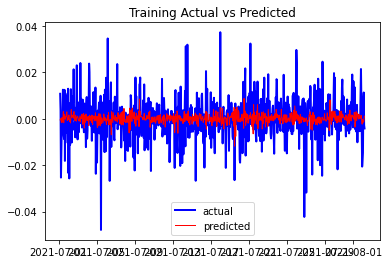

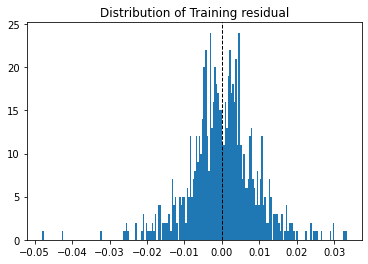

In [55]:
# graphs
model_graphs(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Training')

In [56]:
# confusion matrix
train_confusion = confusion_matrix(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Train')

{'true_positive': 237, 'false_positive': 189, 'true_negative': 186, 'false_negative': 157}

Metrics for [Train]
Accuracy: 0.550 
TP Rate:  0.602 
FP Rate:  0.504
TN Rate:  0.496 
FN Rate:  0.398

            [Train] Confusion Matrix

           |-------------|-------------|
  n= 769  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 186    |  fp: 189    |    375     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 157    |  tp: 237    |    394    |
|----------|-------------|-------------|------------|
           |             |             |
           |      343    |      426   |
           |-------------|-------------|



In [57]:
# test results
# test_lag contains the last 'num_lag' number of observations of the training data in order to make the forecast for the first "real" test observation
test_lag = stationary_model.iloc[len(train) - num_lag :]
test_predicted = predict(data = test_lag, fitted_model = model_fit, lag_order = num_lag, predict_steps = 1)
test_actual = stationary_model.iloc[len(train) :]

0.009402531619029453
RMSE = 0.009402531619029453
 MAE = 0.006988717593196985


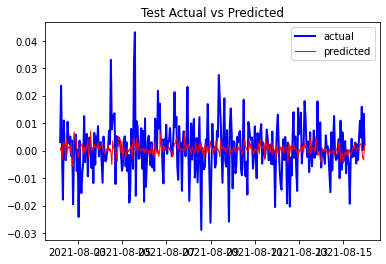

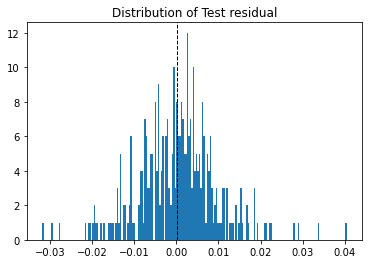

In [58]:
# graphs
model_graphs(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

In [59]:
# confusion matrix
test_confusion = confusion_matrix(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

{'true_positive': 127, 'false_positive': 84, 'true_negative': 60, 'false_negative': 60}

Metrics for [Test]
Accuracy: 0.565 
TP Rate:  0.679 
FP Rate:  0.583
TN Rate:  0.417 
FN Rate:  0.321

            [Test] Confusion Matrix

           |-------------|-------------|
  n= 331  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 60    |  fp: 84    |    144     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 60    |  tp: 127    |    187    |
|----------|-------------|-------------|------------|
           |             |             |
           |      120    |      211   |
           |-------------|-------------|



**Model gives us 56.5% accuracy on test dataset which was evident from the granger causality test as well as none of the X variables granger caused Close prices except polarity, and Dow jones index**

Code Reference - https://github.com/pcann9/Predict_Bitcoin_Using_Reddit_Sentiment/blob/master/7_stationary_transformation.ipynb